In [76]:
import pandas as pd
import statistics as stc
import seaborn as sns

In [77]:
df = pd.read_csv('tempo.csv', sep=';')
df.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [78]:
df.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [79]:
grupo = df.groupby(['Aparencia']).size()
display(grupo)

print('-------------------')

df.loc[df['Aparencia'] == 'menos', 'Aparencia'] = 'sol'
grupo = df.groupby(['Aparencia']).size()
display(grupo)

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

-------------------


Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

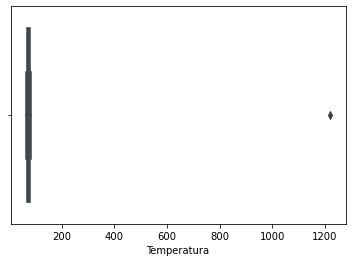

In [80]:
display(df['Temperatura'].describe())
sns.boxplot(x=df['Temperatura']);
mediana = stc.median(df['Temperatura'])

In [81]:
df.loc[(df['Temperatura'] > 200) | (df['Temperatura'] < 0), 'Temperatura'] = mediana
df['Temperatura'].value_counts()

75.0    2
85.0    1
80.0    1
83.0    1
70.0    1
68.0    1
65.0    1
64.0    1
73.5    1
69.0    1
72.0    1
81.0    1
71.0    1
Name: Temperatura, dtype: int64

70.0     3
90.0     2
85.0     1
86.0     1
80.0     1
65.0     1
95.0     1
200.0    1
75.0     1
91.0     1
Name: Umidade, dtype: int64


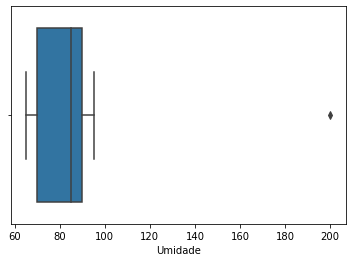

In [82]:
grupo = df['Umidade'].value_counts()
print(grupo)
sns.boxplot(x=df['Umidade']);
mediana_umidade = stc.median(df['Umidade'])

In [83]:
df.loc[df['Umidade'] > 100, 'Umidade'] = mediana_umidade
df['Umidade'].fillna(mediana_umidade, inplace=True)
print(df['Umidade'].value_counts())
print(f'Existem exatos:', df['Umidade'].isna().sum(), 'NAs')


70.0    3
90.0    2
85.5    2
85.0    1
86.0    1
80.0    1
65.0    1
95.0    1
75.0    1
91.0    1
Name: Umidade, dtype: int64
Existem exatos: 0 NAs


In [84]:
print(df['Vento'].value_counts())
print('-------------------')
print('Existem ', df['Vento'].isna().sum(), 'NAs')

FALSO         7
VERDADEIRO    6
Name: Vento, dtype: int64
-------------------
Existem  1 NAs


In [85]:
df['Vento'].fillna('FALSO', inplace=True)
print('Existem ', df['Vento'].isna().sum(), 'NAs')

Existem  0 NAs


In [86]:
df['Jogar'].value_counts()
df['Jogar'].isnull().sum()

0

In [87]:
df

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,sol,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,85.5,FALSO,sim
